In [2]:
import numpy as np
import pandas as pd
def FDM(N):
    h = 1/(N)
    x = np.linspace(h, 1 - h, N)
    y = np.linspace(h, 1 - h, N)
    x_, y_ = np.meshgrid(x,y)

    def f(x, y):
        val = 400 * (x**4 - y**4) * np.sin(20*x*y)
        return val
    
    def u_y(x):
        return 20 * x * (x**2 - 1) * np.cos(20*x) - 2 * np.sin(20*x)
    def u_x(y):
        return 20 *y *(1 - y**2)*np.cos(20*y) + 2 * np.sin(20 * y)
    def u(x, y):
        val = (x**2 - y**2) * np.sin(20*x*y)
        return val
    
    linear_eq_b = []
    
    for i in range(0, N):
        
        for j in range(0, N):
            x0, y0 = x[j], y[i]
            eqt_vector = np.zeros(N*N)

            k = j + i * N
            eqt_vector[k] = -4

            eqt_b = f(x0, y0)


            if (k + 1)/(i + 1) >= N: # x Touch the right boundary
                h1 = 1 - x0
                eqt_vector[k] += 1
                eqt_b += (u_x(y0)/h1)
            else:
                eqt_vector[k + 1] = 1

            if j > 0: # Not Initial Point
                eqt_vector[k - 1] = 1

            k2 = k - N

            if k2 >= 0: # y Touch the left boundary, which means  y = 0
                eqt_vector[k2] = 1

            k3 = k + N

            if k3 / N >= N: # y Touch the right boundary, y = 1
                eqt_vector[k] += 1
                h1 = 1 - y0
                eqt_b += u_y(x0)/h1

            elif k3 / N < N:
                eqt_vector[k3] = 1

            linear_eq_b.append(eqt_b)
            eqt_vector = eqt_vector.reshape(1,-1)
            if j == 0:
                eqt_row_vec = eqt_vector
            else:
                eqt_row_vec = np.concatenate((eqt_row_vec, eqt_vector), axis = 0)

        if i == 0:
            eqt_coef_matrix = eqt_row_vec
        else:
            eqt_coef_matrix = np.concatenate((eqt_coef_matrix,eqt_row_vec), axis = 0)

    coef_mat = -eqt_coef_matrix/(h**2)
    b = np.array([linear_eq_b]).reshape(-1,1)
    numeric_solu = (np.linalg.inv(coef_mat)).dot(b)
    exact_solu = u(x_, y_)
    
    return numeric_solu, exact_solu,eqt_coef_matrix

In [4]:
numeric_solu, exact_solu, eqt_coef_matrix = FDM(5)
df = pd.DataFrame(eqt_coef_matrix)

In [155]:
N_list = np.arange(5, 60, 2)
def mse(x,y):
    l = len(x)
    mseval = np.sum((x-y)**2)/l
    return mseval
mse_val = []
for N in N_list:
    numeric_solu, exact_solu = FDM(N)
    val = mse(numeric_solu.flatten(), exact_solu.flatten())
    mse_val.append(val)

Text(0.5, 0, 'Interval Split Number')

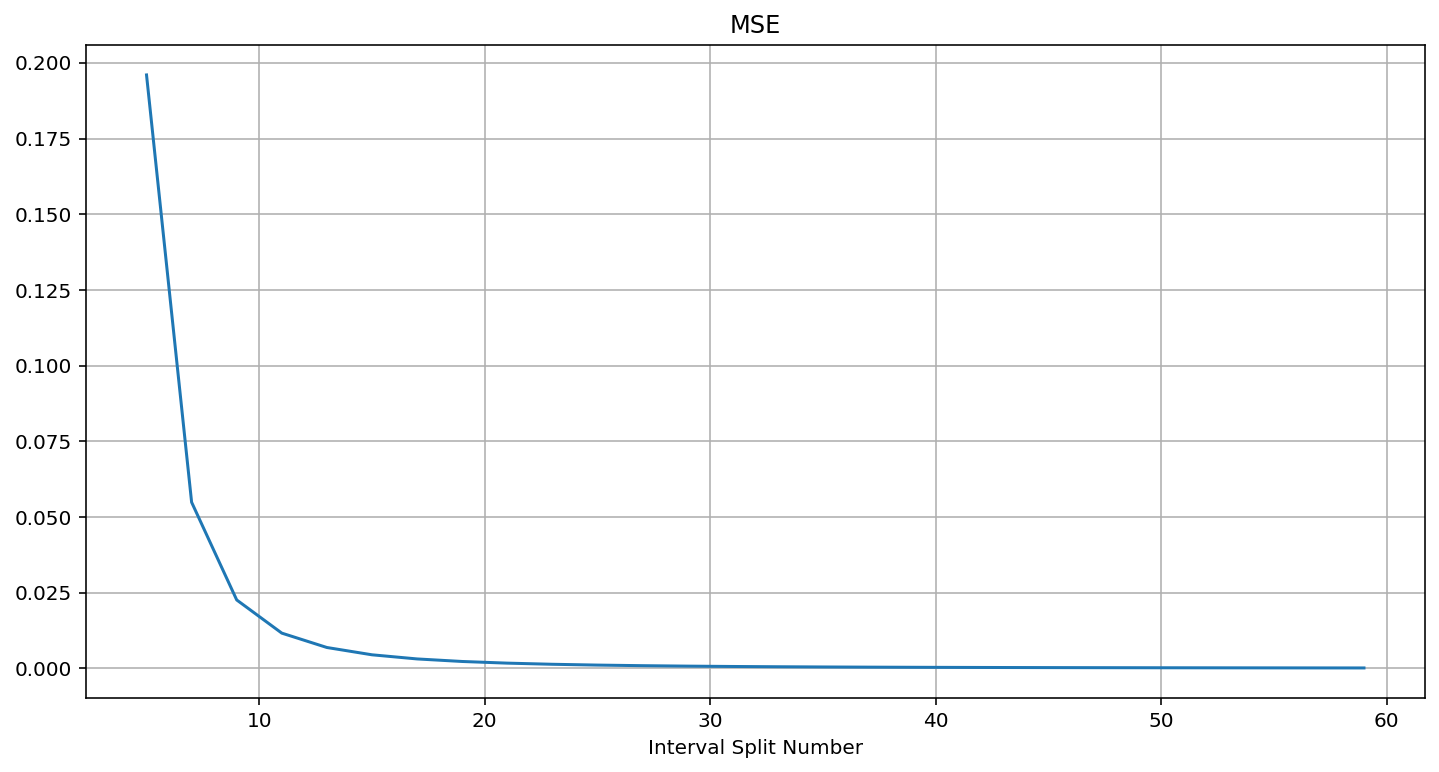

In [156]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
plt.plot(N_list,mse_val)
plt.title('MSE')
plt.grid('True')
plt.xlabel('Interval Split Number')

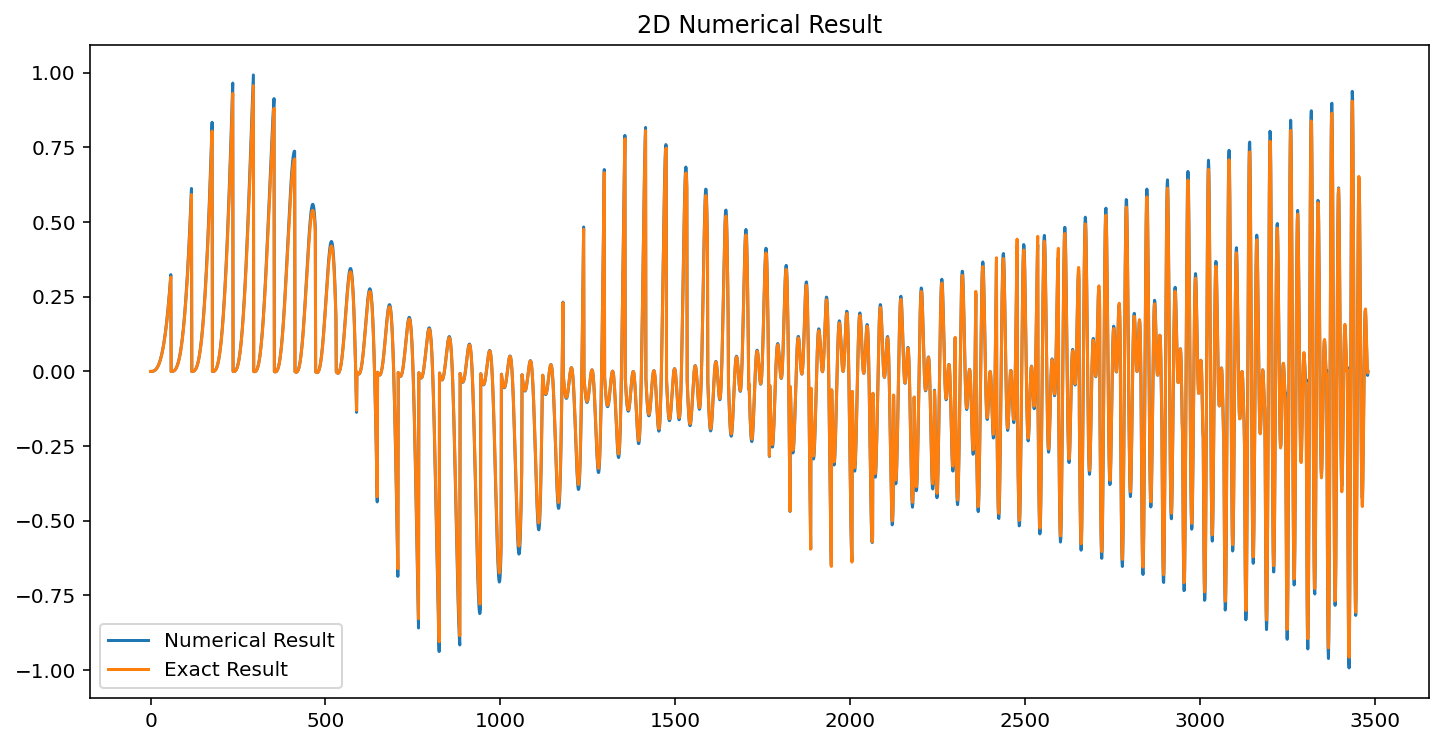

In [157]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
plt.plot(numeric_solu.flatten(), label = 'Numerical Result')
plt.plot(exact_solu.flatten(), label = 'Exact Result')
plt.legend(loc = 0)
plt.title('2D Numerical Result')
plt.show()

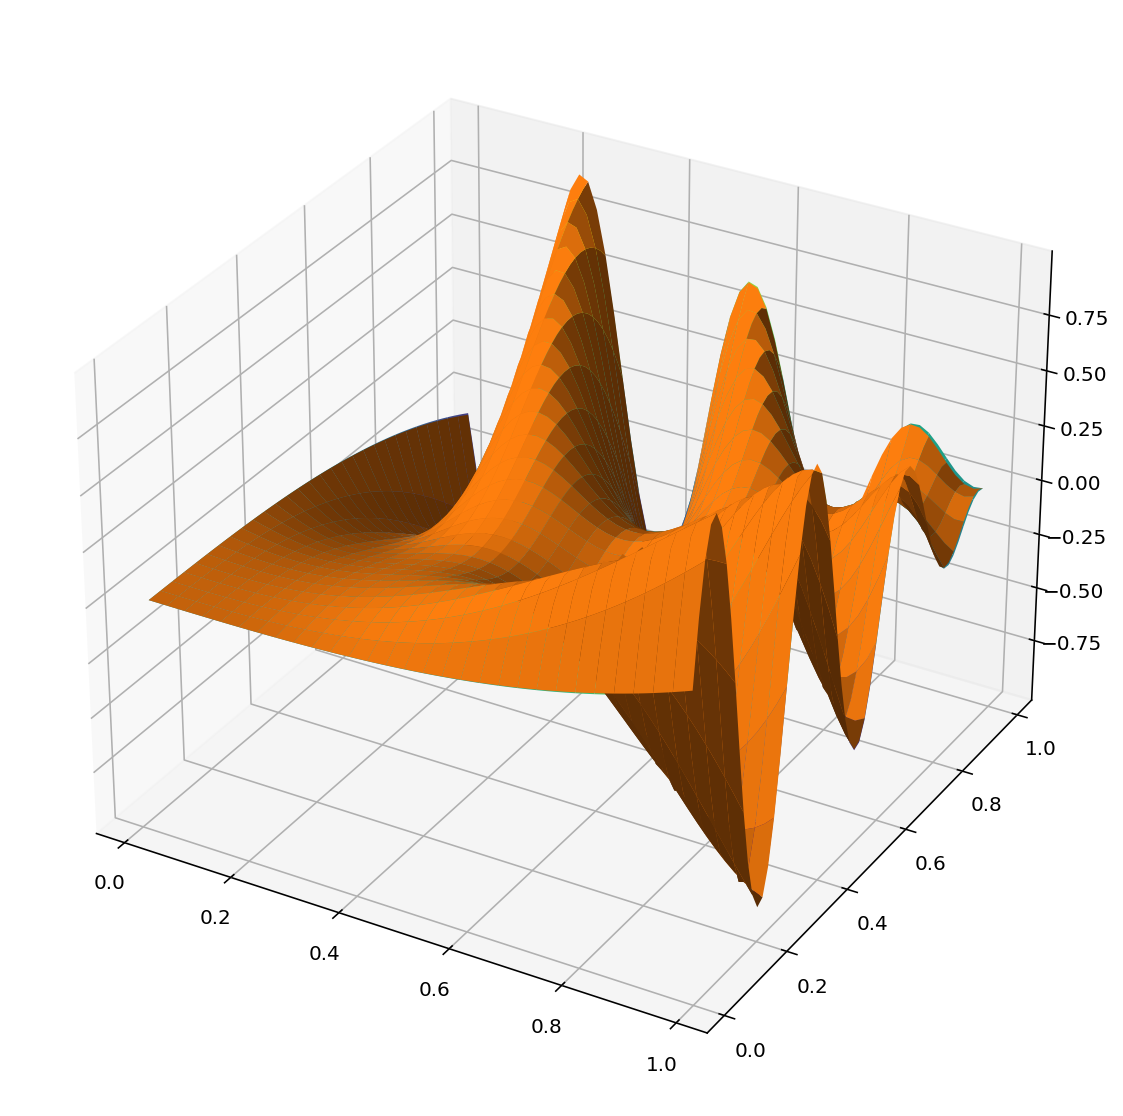

In [158]:
N = 59
h = 1/N
x = np.linspace(h, 1 - h, N)
y = np.linspace(h, 1 - h, N)
x_, y_ = np.meshgrid(x,y)
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_, y_, exact_solu, cmap='viridis')
ax.plot_surface(x_, y_, numeric_solu.reshape(N,N))

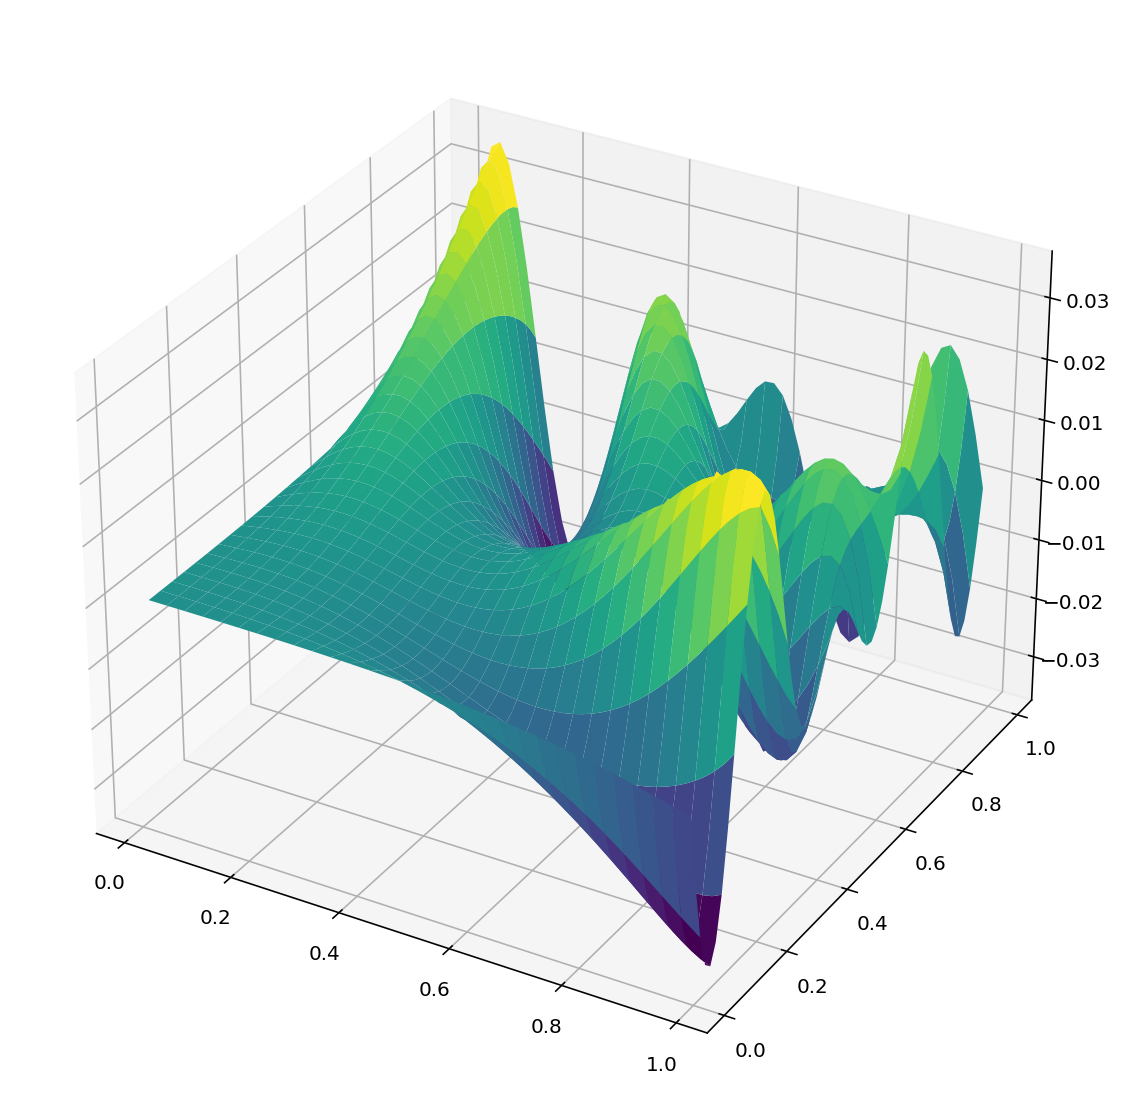

In [159]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_, y_, exact_solu - numeric_solu.reshape(N,N), cmap='viridis')